In [ ]:
!pip install datasets
!pip install huggingface_hub[hf_xet]
!pip install evaluate
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
# !pip install --upgrade transformers

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Loading dataset...
Original dataset size: 5328
Selected 5328 samples for fine-tuning.
Loading pre-trained processor and model...


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Preprocessing dataset...


Map:   0%|          | 0/5328 [00:00<?, ? examples/s]

Preprocessing complete.
Splitting dataset into train and eval splits...
Training samples: 4795, Evaluation samples: 533
Creating data collator...
Setting training arguments...
Loading evaluation metric: WER...


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Initializing Trainer...
Starting fine-tuning...


<ipython-input-7-ab0a81728149>:142: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:174: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(


Step,Training Loss,Validation Loss,Wer
10,-101.915700,-230.731384,0.366926
20,-219.160000,-231.098190,0.367288
30,-200.512700,-291.890900,0.357880
40,-360.825000,-374.749115,0.335082
50,-307.551800,-415.923157,0.316085
60,-449.524700,-444.441132,0.304867
70,-182.135300,-497.466919,0.312104
80,-451.330500,-512.630005,0.303601
90,-472.789800,-534.696045,0.290393
100,-599.253500,-532.791199,0.284603


/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:174: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:174: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call__` method (either in the same call as your audio inputs, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/models/wav2vec2/processing_wav2vec2.py:174: UserWarning: `as_target_processor` is deprecated and will be removed in v5 of Transformers. You can process your labels by using the argument `text` of the regular `__call

Fine-tuning complete.
Fine-tuned model saved to './wav2vec2-finetuned-final'.
Processor saved to './wav2vec2-finetuned-final'.
Extracting and plotting training metrics...
[{'loss': -101.9157, 'grad_norm': nan, 'learning_rate': 0.0, 'epoch': 0.03333333333333333, 'step': 10}, {'eval_loss': -230.73138427734375, 'eval_wer': 0.36692599963814004, 'eval_runtime': 23.75, 'eval_samples_per_second': 22.442, 'eval_steps_per_second': 2.821, 'epoch': 0.03333333333333333, 'step': 10}, {'loss': -219.16, 'grad_norm': 10313.7412109375, 'learning_rate': 1.8e-06, 'epoch': 0.06666666666666667, 'step': 20}, {'eval_loss': -231.0981903076172, 'eval_wer': 0.36728785959833543, 'eval_runtime': 23.7492, 'eval_samples_per_second': 22.443, 'eval_steps_per_second': 2.821, 'epoch': 0.06666666666666667, 'step': 20}, {'loss': -200.5127, 'grad_norm': 17095.158203125, 'learning_rate': 7.2e-06, 'epoch': 0.1, 'step': 30}, {'eval_loss': -291.8908996582031, 'eval_wer': 0.3578795006332549, 'eval_runtime': 23.8004, 'eval_samp

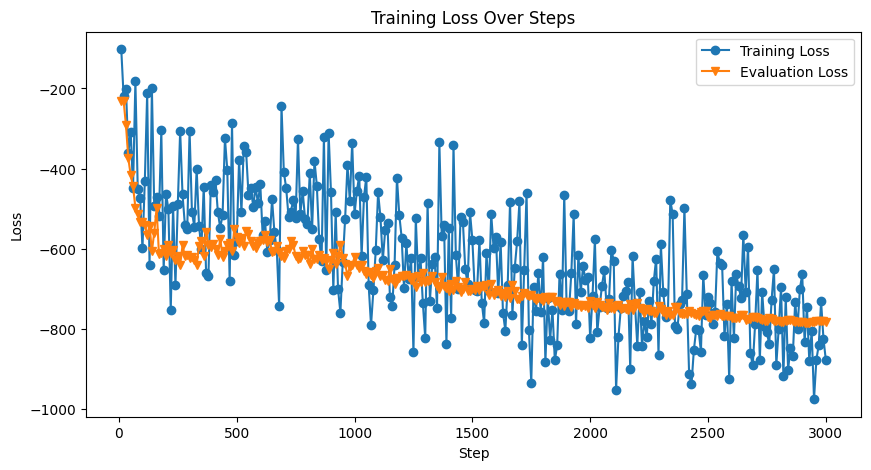

Plotting evaluation WER...


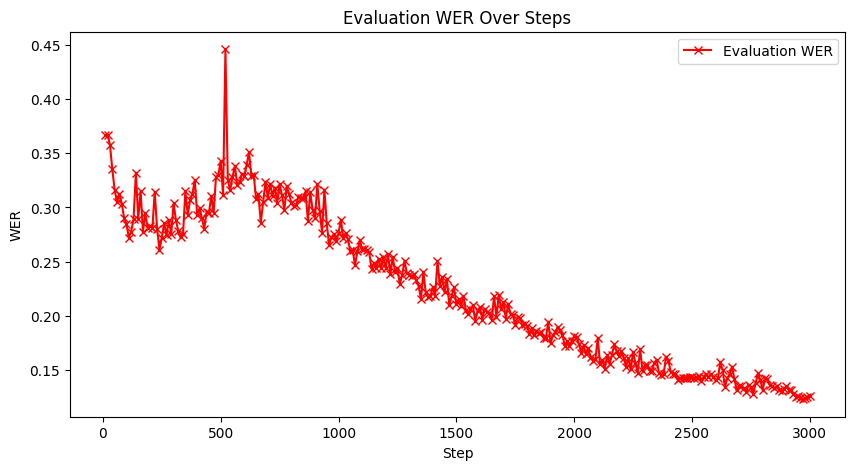

In [ ]:
import os
os.environ["WANDB_API_KEY"] = "cfb02270258a5406e4936e6b81418aeed2963de0"

import wandb
wandb.login(key=os.environ["WANDB_API_KEY"])

from datasets import load_dataset, Audio
import evaluate
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor, TrainingArguments, Trainer
import torch
import matplotlib.pyplot as plt
from dataclasses import dataclass
from transformers import PreTrainedTokenizerBase

@dataclass
class DataCollatorCTCWithPadding:
    processor: any
    padding: str = "longest"
    return_tensors: str = "pt"

    def __call__(self, features):
        # Extract input_values
        input_values = [feature["input_values"] for feature in features]
        # Use the feature_extractor to pad input_values
        batch = self.processor.feature_extractor.pad(
            {"input_values": input_values},
            padding=self.padding,
            return_tensors=self.return_tensors
        )

        # If features include labels then pad those as well.
        if "labels" in features[0]:
            labels = [feature["labels"] for feature in features]
            with self.processor.as_target_processor():
                labels_batch = self.processor.tokenizer.pad(
                    {"input_ids": labels},
                    padding=self.padding,
                    return_tensors=self.return_tensors
                )
            batch["labels"] = labels_batch["input_ids"]
        return batch

# ---------------------------
# 1. Load the Dataset
# ---------------------------
print("Loading dataset...")
# You can change the dataset name or split as needed.
# For example:
# dataset = load_dataset("mozilla-foundation/common_voice_11_0", "en", split="train")
dataset = load_dataset("Hani89/medical_asr_recording_dataset", "default", split="train")
n_samples = len(dataset)
print(f"Original dataset size: {len(dataset)}")
dataset = dataset.select(range(n_samples))
print(f"Selected {n_samples} samples for fine-tuning.")

if dataset[0]["audio"]["sampling_rate"] != 16000:
    print("Casting audio column to 16kHz...")
    dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))
    print("Audio sample rate set to 16kHz.")

# ---------------------------
# 2. Load the Pre-trained Processor and Model
# ---------------------------
print("Loading pre-trained processor and model...")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# ---------------------------
# 3. Preprocess the Dataset
# ---------------------------
print("Preprocessing dataset...")
def prepare_dataset(batch):
    # Assumes audio is already sampled at 16kHz.
    inputs = processor(batch["audio"]["array"], sampling_rate=16000, return_tensors="pt")
    # Since we're mapping in batch mode, assign only the first element.
    batch["input_values"] = inputs.input_values[0]
    batch["sentence"] = batch["sentence"].upper()
    # print(batch["sentence"])
    # print(type(batch["sentence"]))
    with processor.as_target_processor():
        batch["labels"] = processor.tokenizer(batch["sentence"]).input_ids
    return batch

dataset = dataset.map(prepare_dataset, remove_columns=dataset.column_names)
print("Preprocessing complete.")

# ---------------------------
# 4. Split Dataset into Train and Validation Sets
# ---------------------------
print("Splitting dataset into train and eval splits...")
split_dataset = dataset.train_test_split(test_size=0.1)
train_dataset = split_dataset["train"]
eval_dataset = split_dataset["test"]
print(f"Training samples: {len(train_dataset)}, Evaluation samples: {len(eval_dataset)}")

# ---------------------------
# 5. Create Data Collator
# ---------------------------
print("Creating data collator...")
data_collator = DataCollatorCTCWithPadding(processor=processor, padding=True)

# ---------------------------
# 6. Setup Training Arguments
# ---------------------------
print("Setting training arguments...")
training_args = TrainingArguments(
    output_dir="./wav2vec2-finetuned",
    per_device_train_batch_size=8,
    gradient_accumulation_steps=2,
    learning_rate=3e-4,
    num_train_epochs=10,
    save_steps=500,
    evaluation_strategy="steps",
    eval_steps=10,
    logging_steps=10,
    warmup_steps=500,
    fp16=torch.cuda.is_available()
)

# ---------------------------
# 7. Load the Metric (WER)
# ---------------------------
print("Loading evaluation metric: WER...")
wer_metric = evaluate.load("wer")

def compute_metrics(pred):
    pred_logits = pred.predictions
    pred_ids = torch.argmax(torch.tensor(pred_logits), dim=-1)
    # Decode the predictions
    pred_str = processor.batch_decode(pred_ids)
    # Process the labels (replace -100 by pad token id)
    label_ids = pred.label_ids
    label_ids[label_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(label_ids, group_tokens=False)
    wer = wer_metric.compute(predictions=pred_str, references=label_str)
    return {"wer": wer}

# ---------------------------
# 8. Initialize Trainer
# ---------------------------
print("Initializing Trainer...")
trainer = Trainer(
    model=model,
    data_collator=data_collator,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=processor.feature_extractor,
    compute_metrics=compute_metrics,
)

# ---------------------------
# 9. Fine-tune the Model
# ---------------------------
print("Starting fine-tuning...")
train_result = trainer.train()
print("Fine-tuning complete.")
trainer.save_model("./wav2vec2-finetuned-final")
print("Fine-tuned model saved to './wav2vec2-finetuned-final'.")
processor.save_pretrained("./wav2vec2-finetuned-final")
print("Processor saved to './wav2vec2-finetuned-final'.")

# ---------------------------
# 10. Plot Training Metrics (Loss and WER)
# ---------------------------
print("Extracting and plotting training metrics...")

log_history = trainer.state.log_history

print(log_history)

# Extract training loss logs (they may appear during steps with key 'loss')
train_steps = [log["step"] for log in log_history if "loss" in log]
train_losses = [log["loss"] for log in log_history if "loss" in log]
eval_losses = [log["eval_loss"] for log in log_history if "eval_loss" in log]


# Extract evaluation WER logs (they appear with key 'eval_wer')
eval_steps = [log["step"] for log in log_history if "eval_wer" in log]
eval_wer = [log["eval_wer"] for log in log_history if "eval_wer" in log]

if train_steps and train_losses:
    print("Plotting training loss...")
    plt.figure(figsize=(10, 5))
    plt.plot(train_steps, train_losses, label="Training Loss", marker="o")
    plt.plot(train_steps, eval_losses, label="Evaluation Loss", marker="v")
    plt.xlabel("Step")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Steps")
    plt.legend()
    plt.show()
else:
    print("No training loss logs available to plot.")

if eval_steps and eval_wer:
    print("Plotting evaluation WER...")
    plt.figure(figsize=(10, 5))
    plt.plot(eval_steps, eval_wer, label="Evaluation WER", marker="x", color="red")
    plt.xlabel("Step")
    plt.ylabel("WER")
    plt.title("Evaluation WER Over Steps")
    plt.legend()
    plt.show()
else:
    print("No evaluation WER logs available to plot.")


In [ ]:
# print(trainer.state)


In [ ]:
!ls

sample_data  wandb  wav2vec2-finetuned	wav2vec2-finetuned-final


In [ ]:
!zip -r wav2vec2-finetuned-final.zip wav2vec2-finetuned-final

  adding: wav2vec2-finetuned-final/ (stored 0%)
  adding: wav2vec2-finetuned-final/special_tokens_map.json (deflated 45%)
  adding: wav2vec2-finetuned-final/vocab.json (deflated 55%)
  adding: wav2vec2-finetuned-final/training_args.bin (deflated 52%)
  adding: wav2vec2-finetuned-final/preprocessor_config.json (deflated 38%)
  adding: wav2vec2-finetuned-final/tokenizer_config.json (deflated 71%)
  adding: wav2vec2-finetuned-final/config.json (deflated 65%)
  adding: wav2vec2-finetuned-final/model.safetensors (deflated 7%)


In [ ]:
# !zip -r wav2vec2-finetuned.zip wav2vec2-finetuned

In [ ]:
# !unzip wav2vec2-finetuned-final.zip

In [ ]:
# from datasets import load_dataset
# import evaluate
# from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor, TrainingArguments, Trainer
# import torch
# import numpy as np

# # Custom collator for CTC tasks
# from dataclasses import dataclass
# #@dataclass
# class DataCollatorCTCWithPadding:
#     processor: any
#     padding: str = "longest"
#     return_tensors: str = "pt"

#     def __call__(self, features):
#         # Extract input values from each example
#         input_values = [feature["input_values"] for feature in features]
#         batch = self.processor.feature_extractor.pad(
#             {"input_values": input_values},
#             padding=self.padding,
#             return_tensors=self.return_tensors
#         )
#         # If labels exist, pad them as well
#         if "labels" in features[0]:
#             labels = [feature["labels"] for feature in features]
#             with self.processor.as_target_processor():
#                 labels_batch = self.processor.tokenizer.pad(
#                     {"input_ids": labels},
#                     padding=self.padding,
#                     return_tensors=self.return_tensors
#                 )
#             batch["labels"] = labels_batch["input_ids"]
#         return batch

# # Load the fine-tuned model and processor from disk
# model = Wav2Vec2ForCTC.from_pretrained("./wav2vec2-finetuned-final")
# processor = Wav2Vec2Processor.from_pretrained("./wav2vec2-finetuned-final")

# dataset = load_dataset("mozilla-foundation/common_voice_11_0", "en", split="test")
# split_dataset = dataset.train_test_split(test_size=0.1)
# val_dataset = split_dataset["test"].select(range(3000))


# # Preprocess each example into model inputs and labels.
# def prepare_dataset(batch):
#     # Process audio; assumes audio is sampled at 16kHz.
#     inputs = processor(batch["audio"]["array"], sampling_rate=16000, return_tensors="pt")
#     # For a single example mapping, assign the first tensor element.
#     batch["input_values"] = inputs.input_values[0]
#     # Tokenize the transcript.
#     with processor.as_target_processor():
#         batch["labels"] = processor.tokenizer(batch["sentence"]).input_ids
#     return batch

# val_dataset = val_dataset.map(prepare_dataset, remove_columns=val_dataset.column_names)

# # Define evaluation metric (using the evaluate library).
# wer_metric = evaluate.load("wer")

# def compute_metrics(pred):
#     pred_logits = pred.predictions
#     pred_ids = torch.argmax(torch.tensor(pred_logits), dim=-1)
#     pred_str = processor.batch_decode(pred_ids)
#     label_ids = pred.label_ids
#     label_ids[label_ids == -100] = processor.tokenizer.pad_token_id
#     label_str = processor.batch_decode(label_ids, group_tokens=False)
#     wer = wer_metric.compute(predictions=pred_str, references=label_str)
#     return {"wer": wer}

# # Define minimal training arguments for evaluation.
# training_args = TrainingArguments(
#     output_dir="./tmp_eval",
#     per_device_eval_batch_size=8,
#     logging_steps=10
# )

# # Create the data collator.
# data_collator = DataCollatorCTCWithPadding(processor=processor)

# # Initialize the Trainer for evaluation.
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     eval_dataset=val_dataset,
#     tokenizer=processor.feature_extractor,
#     data_collator=data_collator,
#     compute_metrics=compute_metrics,
# )

# # Run evaluation and print metrics.
# metrics = trainer.evaluate()
# print("Evaluation Metrics:", metrics)


In [ ]:
import torch
from datasets import load_dataset, Audio
import torchaudio
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import pandas as pd

# ---------------------------
# Load model and processor from the saved directory
# ---------------------------
print("Loading fine-tuned model and processor from './wav2vec2-finetuned-final'...")
model = Wav2Vec2ForCTC.from_pretrained("./wav2vec2-finetuned-final")
processor = Wav2Vec2Processor.from_pretrained("./wav2vec2-finetuned-final")

# processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
# model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Model moved to device: {device}\n")

# ---------------------------
# Load a validation split and select a subset
# ---------------------------
print("Loading validation dataset from 'Hani89/medical_asr_recording_dataset' (test split)...")
val_subset = load_dataset("Hani89/medical_asr_recording_dataset", "default", split="test")
n_samples_val = len(val_subset)
print(f"Original dataset size: {len(val_subset)}")
val_subset = val_subset.select(range(n_samples_val))
print(f"Selected {n_samples_val} validation samples.\n")

# Ensure the audio is at the correct sample rate (16kHz)
if val_subset[0]["audio"]["sampling_rate"] != 16000:
    print("Casting audio column to 16kHz...")
    val_subset = val_subset.cast_column("audio", Audio(sampling_rate=16000))
print(f"Sampling rate for first sample: {val_subset[0]['audio']['sampling_rate']}\n")
sampling_rate = val_subset[0]["audio"]["sampling_rate"]

# ---------------------------
# Preprocess dataset to prepare inputs and reference transcripts
# ---------------------------
print("Preprocessing validation dataset...")
def prepare_dataset(batch):
    inputs = processor(batch["audio"]["array"], sampling_rate=sampling_rate, return_tensors="pt")
    # For a single example, select the first tensor element
    batch["input_values"] = inputs.input_values[0]
    # Keep the original transcript in "actual"
    # batch["sentence"] = batch["sentence"].upper()
    batch["actual"] = batch["sentence"].upper()
    return batch

val_subset = val_subset.map(prepare_dataset, remove_columns=val_subset.column_names)
print("Preprocessing complete.\n")

# ---------------------------
# Define a batch prediction function that pads and generates outputs
# ---------------------------
print("Starting batch predictions on validation dataset...")
def predict_batch(batch):
    # Pad list of input_values into a tensor of shape (batch_size, max_length)
    padded_inputs = processor.feature_extractor.pad(
        {"input_values": batch["input_values"]},
        padding="longest",
        return_tensors="pt",
    )
    input_values = padded_inputs.input_values.to(device)

    with torch.no_grad():
        logits = model(input_values).logits
    pred_ids = torch.argmax(logits, dim=-1)
    predictions = processor.batch_decode(pred_ids)
    batch["prediction"] = predictions
    return batch

val_subset = val_subset.map(predict_batch, batched=True, batch_size=8)
print("Batch predictions complete.\n")

# ---------------------------
# Prepare and save the results to a CSV file
# ---------------------------
print("Preparing results for CSV export...")
results = [{"actual": ex["actual"], "prediction": ex["prediction"]} for ex in val_subset]
df = pd.DataFrame(results)
df.to_csv("predictions.csv", index=False)
print("CSV file 'predictions.csv' with predictions has been saved.")


Loading fine-tuned model and processor from './wav2vec2-finetuned-final'...
Model moved to device: cuda

Loading validation dataset from 'Hani89/medical_asr_recording_dataset' (test split)...
Original dataset size: 1333
Selected 1333 validation samples.

Sampling rate for first sample: 16000

Preprocessing validation dataset...


Map:   0%|          | 0/1333 [00:00<?, ? examples/s]

Preprocessing complete.

Starting batch predictions on validation dataset...


Parameter 'function'=<function predict_batch at 0x790fd7915ee0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/1333 [00:00<?, ? examples/s]

Batch predictions complete.

Preparing results for CSV export...
CSV file 'predictions.csv' with predictions has been saved.


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Map:   0%|          | 0/134 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:3980: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-4-7419e8fe476d>:95: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


Epoch,Training Loss,Validation Loss
1,0.704900,0.672242
2,0.652700,0.593327
3,0.902200,0.562108
4,0.658000,0.536929
5,0.652900,0.524121
6,0.504900,0.514910
7,0.597900,0.507874
8,0.616000,0.503557
9,0.494000,0.501827
10,0.564700,0.501242


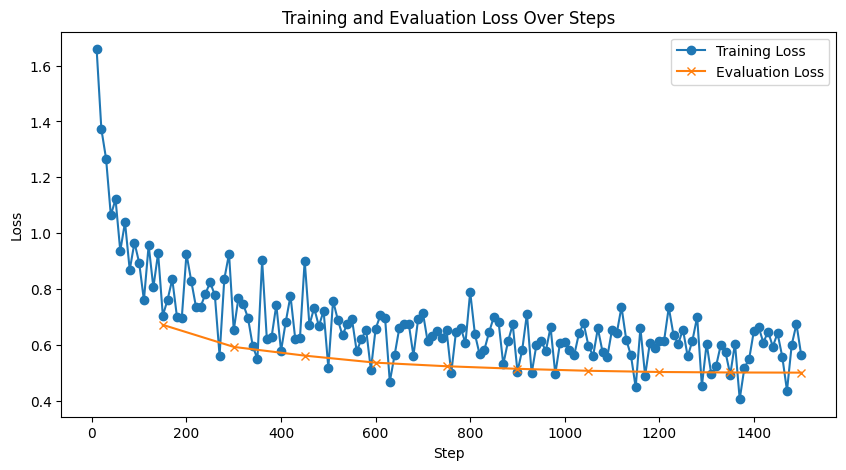

No evaluation WER logs available to plot.
Corrected text: my choky social


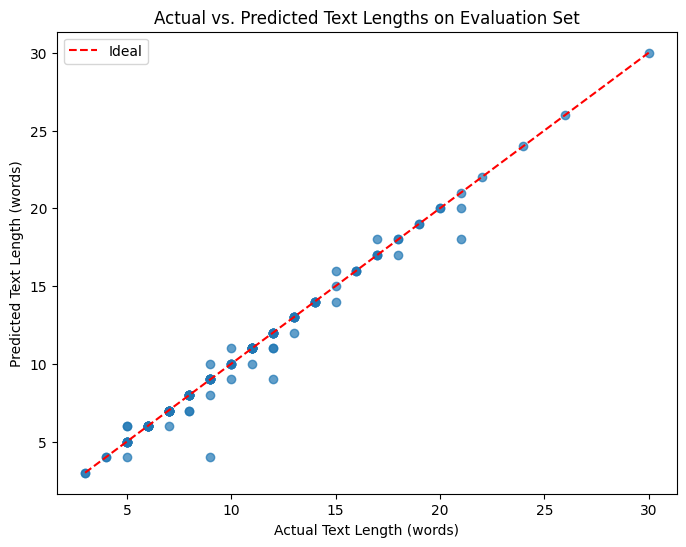

In [ ]:
import os
os.environ["WANDB_API_KEY"] = "cfb02270258a5406e4936e6b81418aeed2963de0"

import wandb
wandb.login(key=os.environ["WANDB_API_KEY"])

import matplotlib.pyplot as plt
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSeq2SeqLM,
    Seq2SeqTrainingArguments,
    Seq2SeqTrainer,
    DataCollatorForSeq2Seq
)
import torch

# ---------------------------
# 1. Load and Preprocess the CSV Data
# ---------------------------
# Load your CSV file as a single split.
raw_dataset = load_dataset("csv", data_files={"data": "predictions.csv"})["data"]

# Preprocess: add a "inputs" field (prefixed with "Correct: ") and two target fields:
# "targets" for tokenization and "target_text" to hold the original string (for later evaluation).
def preprocess_examples(examples):
    inputs = ["Correct this: " + str(pred).lower() for pred in examples["prediction"]]
    targets = [str(sentense).lower() for sentense in examples["actual"]]
    return {"inputs": inputs, "targets": targets, "target_text": targets}

raw_dataset = raw_dataset.map(preprocess_examples, batched=True)

# ---------------------------
# 2. Split the Dataset into Train and Evaluation
# ---------------------------
split_datasets = raw_dataset.train_test_split(test_size=0.1, seed=42)
train_dataset = split_datasets["train"]
eval_dataset = split_datasets["test"]

# ---------------------------
# 3. Load the Model and Tokenizer
# ---------------------------

model_checkpoint = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSeq2SeqLM.from_pretrained(model_checkpoint)

# ---------------------------
# 4. Tokenize the Datasets
# ---------------------------
def tokenize_function(examples):
    # Tokenize inputs; no padding here (we'll use a collator for dynamic padding)
    model_inputs = tokenizer(examples["inputs"], max_length=256, truncation=True)
    # Tokenize targets as labels
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples["targets"], max_length=256, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# For training, remove unnecessary columns.
tokenized_train = train_dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=train_dataset.column_names
)
# For evaluation, we keep the original "target_text" for later analysis.
tokenized_eval = eval_dataset.map(
    tokenize_function,
    batched=True,
    remove_columns=[col for col in eval_dataset.column_names if col != "target_text"]
)

# ---------------------------
# 5. Create a Data Collator
# ---------------------------
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# ---------------------------
# 6. Setup Training Arguments and Trainer
# ---------------------------
training_args = Seq2SeqTrainingArguments(
    output_dir="./fine_tuned_medical_model",  # directory to store model checkpoints
    evaluation_strategy="epoch",              # evaluate each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    num_train_epochs=10,
    eval_steps=10,
    logging_steps=10,
    predict_with_generate=True,
    logging_dir="./logs",
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_eval,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

# ---------------------------
# 7. Fine-Tune the Model
# ---------------------------
train_result = trainer.train()
trainer.save_model("my_finetuned_medical_model")

# ---------------------------
# 8. Plot the Training Process: Loss and Evaluation Loss Over Steps
# ---------------------------
# Extract the training log history.
log_history = trainer.state.log_history

# Filter entries that contain training loss and evaluation loss.
train_steps = [entry['step'] for entry in log_history if 'loss' in entry]
train_losses = [entry['loss'] for entry in log_history if 'loss' in entry]
eval_steps = [entry['step'] for entry in log_history if 'eval_loss' in entry]
eval_losses = [entry['eval_loss'] for entry in log_history if 'eval_loss' in entry]


plt.figure(figsize=(10, 5))
plt.plot(train_steps, train_losses, label="Training Loss", marker="o")
plt.plot(eval_steps, eval_losses, label="Evaluation Loss", marker="x")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Training and Evaluation Loss Over Steps")
plt.legend()
plt.show()


# Extract evaluation WER logs (they appear with key 'eval_wer')
eval_steps = [log["step"] for log in log_history if "eval_wer" in log]
eval_wer = [log["eval_wer"] for log in log_history if "eval_wer" in log]

if eval_steps and eval_wer:
    print("Plotting evaluation WER...")
    plt.figure(figsize=(10, 5))
    plt.plot(eval_steps, eval_wer, label="Evaluation WER", marker="x", color="red")
    plt.xlabel("Step")
    plt.ylabel("WER")
    plt.title("Evaluation WER Over Steps")
    plt.legend()
    plt.show()
else:
    print("No evaluation WER logs available to plot.")

# ---------------------------
# 9. Testing the Fine-Tuned Model and Plotting a Simple Analysis
# ---------------------------
# Test with a sample erroneous prediction.
test_input = "Correct: MY CHOKY SOCIAL".lower()
inputs = tokenizer(test_input, return_tensors="pt")
# Ensure input is on the same device as the model.
inputs = {key: value.to(model.device) for key, value in inputs.items()}
outputs = model.generate(inputs["input_ids"], max_length=256)
corrected_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Corrected text:", corrected_text)

# Additionally, run evaluation on the evaluation dataset to obtain predictions:
predictions_output = trainer.predict(tokenized_eval, max_length=256)

# Filter out any token IDs that are not within the expected vocabulary range
vocab_size = tokenizer.vocab_size
filtered_preds = []
for seq in predictions_output.predictions:
    filtered_seq = [int(token) if 0 <= int(token) < vocab_size else tokenizer.eos_token_id for token in seq]
    filtered_preds.append(filtered_seq)

# Now decode the filtered predictions
pred_texts = tokenizer.batch_decode(filtered_preds, skip_special_tokens=True)

# Retrieve the original target texts from the evaluation dataset.
actual_texts = eval_dataset["target_text"]

# For demonstration, plot a scatter graph comparing the word counts of the predictions vs. the actual texts.
pred_lengths = [len(text.split()) for text in pred_texts]
actual_lengths = [len(text.split()) for text in actual_texts]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(actual_lengths, pred_lengths, alpha=0.7)
plt.xlabel("Actual Text Length (words)")
plt.ylabel("Predicted Text Length (words)")
plt.title("Actual vs. Predicted Text Lengths on Evaluation Set")
# Plot a red dashed ideal reference line (where prediction length equals actual length)
min_len = min(min(actual_lengths), min(pred_lengths))
max_len = max(max(actual_lengths), max(pred_lengths))
plt.plot([min_len, max_len], [min_len, max_len], color="red", linestyle="--", label="Ideal")
plt.legend()
plt.show()


In [ ]:
!zip -r my_finetuned_medical_model.zip my_finetuned_medical_model

  adding: my_finetuned_medical_model/ (stored 0%)
  adding: my_finetuned_medical_model/special_tokens_map.json (deflated 85%)
  adding: my_finetuned_medical_model/training_args.bin (deflated 52%)
  adding: my_finetuned_medical_model/generation_config.json (deflated 29%)
  adding: my_finetuned_medical_model/spiece.model (deflated 48%)
  adding: my_finetuned_medical_model/tokenizer_config.json (deflated 95%)
  adding: my_finetuned_medical_model/tokenizer.json (deflated 74%)
  adding: my_finetuned_medical_model/config.json (deflated 63%)
  adding: my_finetuned_medical_model/model.safetensors (deflated 12%)


In [ ]:
import glob
from google.colab import files

# Find all ZIP files in the current directory
zip_files = glob.glob("*.zip")
print("Found the following ZIP files:", zip_files)

# Download each ZIP file
for zip_file in zip_files:
    print("Downloading", zip_file, "...")
    files.download(zip_file)
    print(zip_file, "download triggered.")



# Find all csv files in the current directory
csv_files = glob.glob("*.csv")
print("Found the following csv files:", csv_files)

# Download each ZIP file
for csv_file in csv_files:
    print("Downloading", csv_file, "...")
    files.download(csv_file)
    print(csv_file, "download triggered.")